# Temperature Influence On Humidity Using PCA Approach

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
aa = pd.read_excel('PCA.xlsx')

In [4]:
aa

,Temperature (T),Humidity (H)
0,40,90
1,40,90
2,40,90
3,30,90
4,15,70
5,15,70
6,15,70
7,30,90
8,15,70
9,30,70


In [5]:
aq = aa['Temperature (T)'].mean()
aq

np.float64(28.571428571428573)

In [6]:
aw = aa['Humidity (H)'].mean()
aw

np.float64(80.0)

In [7]:
T_prime = aa['Temperature (T)'] - aq
T_prime

0     11.428571
1     11.428571
2     11.428571
3      1.428571
4    -13.571429
5    -13.571429
6    -13.571429
7      1.428571
8    -13.571429
9      1.428571
10     1.428571
11     1.428571
12    11.428571
13     1.428571
Name: Temperature (T), dtype: float64

In [8]:
H_prime = aa['Humidity (H)'] - aw
H_prime

0     10.0
1     10.0
2     10.0
3     10.0
4    -10.0
5    -10.0
6    -10.0
7     10.0
8    -10.0
9    -10.0
10   -10.0
11    10.0
12   -10.0
13    10.0
Name: Humidity (H), dtype: float64

In [9]:
T_prime_2 = T_prime**2
T_prime_2

0     130.612245
1     130.612245
2     130.612245
3       2.040816
4     184.183673
5     184.183673
6     184.183673
7       2.040816
8     184.183673
9       2.040816
10      2.040816
11      2.040816
12    130.612245
13      2.040816
Name: Temperature (T), dtype: float64

In [10]:
H_prime_2 = H_prime**2
H_prime_2

0     100.0
1     100.0
2     100.0
3     100.0
4     100.0
5     100.0
6     100.0
7     100.0
8     100.0
9     100.0
10    100.0
11    100.0
12    100.0
13    100.0
Name: Humidity (H), dtype: float64

In [11]:
multiply_primes = T_prime * H_prime
multiply_primes

0     114.285714
1     114.285714
2     114.285714
3      14.285714
4     135.714286
5     135.714286
6     135.714286
7      14.285714
8     135.714286
9     -14.285714
10    -14.285714
11     14.285714
12   -114.285714
13     14.285714
dtype: float64

In [12]:
aa['T_prime'] = T_prime
aa['H_prime'] = H_prime
aa['T_prime_2'] = T_prime_2
aa['H_prime_2'] = H_prime_2
aa['T_H_prime'] = multiply_primes

In [13]:
aa

,Temperature (T),Humidity (H),T_prime,H_prime,T_prime_2,H_prime_2,T_H_prime
0,40,90,11.428571,10.0,130.612245,100.0,114.285714
1,40,90,11.428571,10.0,130.612245,100.0,114.285714
2,40,90,11.428571,10.0,130.612245,100.0,114.285714
3,30,90,1.428571,10.0,2.040816,100.0,14.285714
4,15,70,-13.571429,-10.0,184.183673,100.0,135.714286
5,15,70,-13.571429,-10.0,184.183673,100.0,135.714286
6,15,70,-13.571429,-10.0,184.183673,100.0,135.714286
7,30,90,1.428571,10.0,2.040816,100.0,14.285714
8,15,70,-13.571429,-10.0,184.183673,100.0,135.714286
9,30,70,1.428571,-10.0,2.040816,100.0,-14.285714


In [14]:
ae = aa['T_prime_2'].sum()
ae.round(3)

np.float64(1271.429)

In [15]:
var_T = ae/13
var_T
print(f'The variance of Temperature is {var_T}')

The variance of Temperature is 97.80219780219781


In [16]:
ar = aa['H_prime_2'].sum()
ar

np.float64(1400.0)

In [17]:
var_H = ar/13
var_H
print(f'The variance of Humidity is {var_H}')

The variance of Humidity is 107.6923076923077


In [18]:
at = aa['T_H_prime'].sum()
at

np.float64(800.0)

In [19]:
cov_T_H = at/13
cov_T_H
print(f'The covariance is {cov_T_H}')

The covariance is 61.53846153846154


In [20]:
cov_matrix = np.array([[var_T, cov_T_H], [cov_T_H, var_H]])
cov_matrix

array([[ 97.8021978 ,  61.53846154],
       [ 61.53846154, 107.69230769]])

# Computing for the eigenvalues and eigenvectors 

In [21]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvalues

array([ 41.01042568, 164.48407982])

In [22]:
Lambda1 = 41.01042568
Lambda2 = 164.48407982

In [23]:
eigenvectors[:,0]*-1

array([ 0.73488059, -0.67819652])

In [24]:
eigenvectors[:,1]* -1

array([0.67819652, 0.73488059])

In [25]:
'''Arranging the eigenvalues in terms of descending order so that the largest eigenvector is used to find PC1'''
idx = np.argsort(eigenvalues)[::-1]

sorted_eigenvalues = eigenvalues[idx]
sorted_eigenvectors = eigenvectors[:, idx]*-1
sorted_eigenvectors

array([[ 0.67819652,  0.73488059],
       [ 0.73488059, -0.67819652]])

In [26]:
PC1 = sorted_eigenvectors[:, 0]
PC1

array([0.67819652, 0.73488059])

In [27]:
PC2 = sorted_eigenvectors[:, 1]
PC2

array([ 0.73488059, -0.67819652])

# solving for the PC1 & PC2

In [28]:
PC1 = np.round(PC1,3)
PC2 = np.round(PC2,3)


print(f'The matrix for PC1 is: {PC1}')
print(f'The matrix for PC2 is: {PC2}')

The matrix for PC1 is: [0.678 0.735]
The matrix for PC2 is: [ 0.735 -0.678]


In [29]:
import matplotlib.pyplot as plt

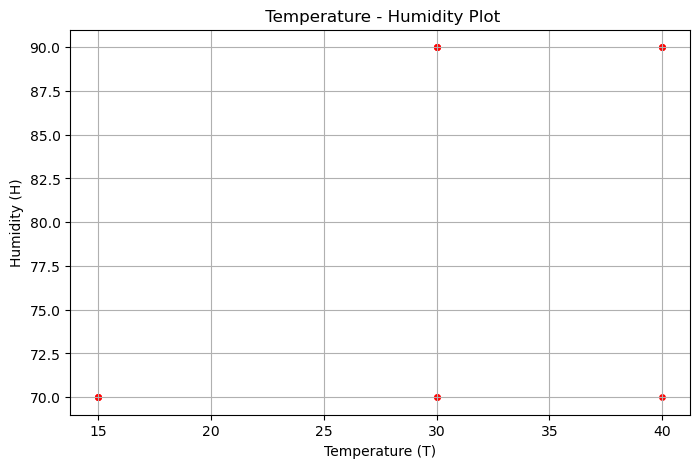

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(aa['Temperature (T)'], aa['Humidity (H)'], color='red', s=15, alpha= 1)
plt.title(" Temperature - Humidity Plot")
plt.xlabel("Temperature (T)")
plt.ylabel("Humidity (H)")
plt.grid(True)
plt.show()


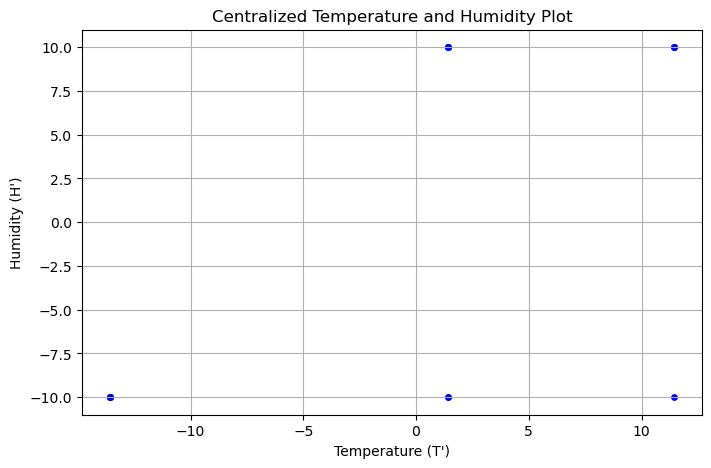

In [35]:
plt.figure(figsize=(8,5))


plt.scatter(T_prime, H_prime, color='blue', s=15, alpha= 1)

plt.title("Centralized Temperature and Humidity Plot")
plt.xlabel("Temperature (T')")
plt.ylabel("Humidity (H')")
plt.grid(True)
plt.show()


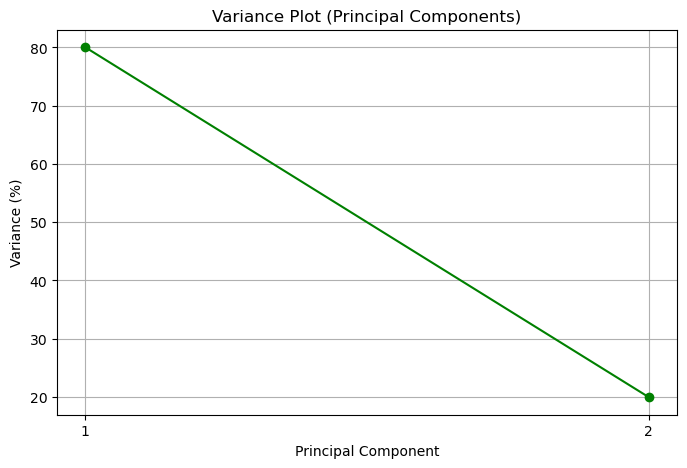

In [36]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


total_variance = sum(eigenvalues)
variance_explained = [(i / total_variance)*100 for i in eigenvalues]


sorted_variance = sorted(variance_explained, reverse=True)


plt.figure(figsize=(8,5))
plt.plot(range(1, len(sorted_variance)+1), sorted_variance, 'o-', color='green')

plt.title('Variance Plot (Principal Components)')
plt.xlabel('Principal Component')
plt.ylabel('Variance (%)')
plt.xticks(range(1, len(sorted_variance)+1))
plt.grid(True)
plt.show()


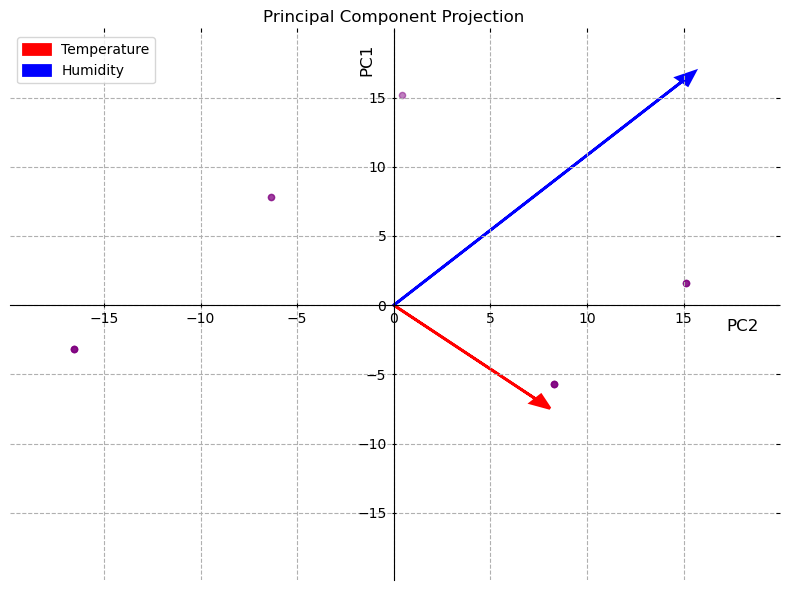

In [37]:
projected_data = np.dot(np.array([T_prime, H_prime]).T, sorted_eigenvectors)


arrow_scale_temp = 10
arrow_scale_hum  = 22

temp_arrow = sorted_eigenvectors[:, 1] * arrow_scale_temp
hum_arrow  = sorted_eigenvectors[:, 0] * arrow_scale_hum


fig, ax = plt.subplots(figsize=(8, 6))

# Plot projected data points
ax.scatter(projected_data[:, 0], projected_data[:, 1],
           color='purple', s=20, alpha=0.5)

# Plot Temperature arrow with label for legend
ax.arrow(0, 0, temp_arrow[0], temp_arrow[1],
         color='red', linewidth=2, head_width=0.8, head_length=1,
         label='Temperature')

# Plot Humidity arrow with label for legend
ax.arrow(0, 0, hum_arrow[0], hum_arrow[1],
         color='blue', linewidth=2, head_width=0.8, head_length=1,
         label='Humidity')

# Set symmetrical axis limits
max_val = np.max(np.abs(projected_data)) * 1.2
ax.set_xlim(-max_val, max_val)
ax.set_ylim(-max_val, max_val)

# Make the plot look like a Cartesian plane
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')


ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_tick_params(direction='inout')
ax.yaxis.set_tick_params(direction='inout')


ax.set_xlabel('')
ax.set_ylabel('')
ax.text(max_val * 0.95, -max_val * 0.05, 'PC2', fontsize=12, ha='right', va='top')
ax.text(-max_val * 0.05, max_val * 0.95, 'PC1', fontsize=12, ha='right', va='top', rotation=90)


ax.set_title('Principal Component Projection')
ax.grid(True, linestyle='--', alpha=1.0)


ax.legend(loc='upper left')

plt.tight_layout()
plt.show()
